# Exploración de datos Básica

### Importación de librerías para la exploracion de datos

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


transformo el conjunto de datos en un cuadro

In [6]:
df = pd.read_csv("payments.csv")

In [7]:
df.head()

,Time & Date,Currency,Amount,Payment Type,Payment Provider,City,Order Type,Order ID,Name,Quantity,Discount,Shipping,Status
0,"5/3/2023, 1:10:23 PM",INR,319,Single payment,Razorpay,Ernakulam,eCom Platform,11196,"Ruby (Only 1) Gloss Tube:Sample(3ml), Hibiscus...",2,NaN,80.0,Successful
1,"25/12/2022, 08:07:04 PM",INR,570,Single payment,Offline Payments,Bhopal,eCom Platform,11195,"Woody (Only 1) Gloss Tube:Sample(1ml), Bills (...",7,NaN,150.0,Successful
2,"22/12/2022, 11:41:54 PM",INR,448,Single payment,Offline Payments,Bengaluru,eCom Platform,11194,"Boujee Lip Oil, Hibiscus Lip OIl",2,NaN,150.0,Successful
3,"22/12/2022, 10:39:43 AM",INR,260,Single payment,Razorpay,bangalore,eCom Platform,11193,Dinero (Only 1) Gloss Tube:Sample(3ml),2,NaN,80.0,Successful
4,"21/11/2022, 12:46:52 PM",INR,468,Single payment,Razorpay,Namburu,eCom Platform,11192,"Brown Sugar Lip and Cheek Tint, Nudes, Cotton ...",3,NaN,80.0,Successful


In [8]:
df.shape

(1127, 13)

### Datos del conjunto 
 * Filas = 1127 
 * Columnas = 13

In [9]:
column_names= df.columns
print(column_names)

Index(['Time & Date', 'Currency', 'Amount', 'Payment Type', 'Payment Provider',
       'City', 'Order Type', 'Order ID', 'Name', 'Quantity', 'Discount',
       'Shipping', 'Status'],
      dtype='object')


### Nombre de las columnas
     
- Time y date 
- Currency 
- Amount
- Payment Type
- Payment Provider 
- City
- Order Type 
- Order ID 
- Name 
- Quantity 
- Discount 
- Shipping 
- Status

In [10]:
data_types= df.dtypes
print(data_types)

Time & Date          object
Currency             object
Amount               object
Payment Type         object
Payment Provider     object
City                 object
Order Type           object
Order ID             object
Name                 object
Quantity              int64
Discount             object
Shipping            float64
Status               object
dtype: object


### Separamos la columna de fecha y hora 

In [11]:
df['Time & Date'] = pd.to_datetime(df['Time & Date'])

# Extraer la fecha en una nueva columna
df['Date'] = df['Time & Date'].dt.date

# Extraer la hora en una nueva columna
df['Time'] = df['Time & Date'].dt.time

df= df.drop("Time & Date",axis =1)

df.head()


,Currency,Amount,Payment Type,Payment Provider,City,Order Type,Order ID,Name,Quantity,Discount,Shipping,Status,Date,Time
0,INR,319,Single payment,Razorpay,Ernakulam,eCom Platform,11196,"Ruby (Only 1) Gloss Tube:Sample(3ml), Hibiscus...",2,NaN,80.0,Successful,2023-05-03,13:10:23
1,INR,570,Single payment,Offline Payments,Bhopal,eCom Platform,11195,"Woody (Only 1) Gloss Tube:Sample(1ml), Bills (...",7,NaN,150.0,Successful,2022-12-25,20:07:04
2,INR,448,Single payment,Offline Payments,Bengaluru,eCom Platform,11194,"Boujee Lip Oil, Hibiscus Lip OIl",2,NaN,150.0,Successful,2022-12-22,23:41:54
3,INR,260,Single payment,Razorpay,bangalore,eCom Platform,11193,Dinero (Only 1) Gloss Tube:Sample(3ml),2,NaN,80.0,Successful,2022-12-22,10:39:43
4,INR,468,Single payment,Razorpay,Namburu,eCom Platform,11192,"Brown Sugar Lip and Cheek Tint, Nudes, Cotton ...",3,NaN,80.0,Successful,2022-11-21,12:46:52


### Hallamos valores nulos 

In [12]:
df.isnull().sum()

Currency              0
Amount                0
Payment Type          0
Payment Provider      0
City                  0
Order Type            0
Order ID              0
Name                  0
Quantity              0
Discount            819
Shipping            248
Status                0
Date                  0
Time                  0
dtype: int64

### Podemos ver que hay muchos valores de descuento que son nulos, además la columna es "Object"
### Cambio el tipo de valor a float 

### Primero convertimos las "," y espacios vacios a "." para leer correctamente el valor "float"

In [13]:
df['Discount']=df['Discount'].str.replace(',','').astype('float64')

### Convertimos el tipo de dato "Amount" a un numero entero

In [14]:
df['Amount']=df['Amount'].str.replace(',','').astype('float64').round().astype('int64')

In [15]:
# Reemplazar los valores nulos con 0.0
df['Discount'].fillna(0.0, inplace=True) 
 
df['Shipping'].fillna(0.0, inplace = True)

In [16]:
df.isnull().sum()

Currency            0
Amount              0
Payment Type        0
Payment Provider    0
City                0
Order Type          0
Order ID            0
Name                0
Quantity            0
Discount            0
Shipping            0
Status              0
Date                0
Time                0
dtype: int64

### En este caso NO usamos la media porque queremos revisar la cantidad de ventas que hay cuando existe descuento

In [17]:
df.describe()

,Amount,Quantity,Discount,Shipping
count,1127.000000,1127.000000,1127.000000,1127.000000
mean,737.160603,2.635315,25.907684,55.244011
std,712.684338,2.239067,76.852365,36.617143
min,110.000000,1.000000,0.000000,0.000000
25%,336.000000,1.000000,0.000000,50.000000
50%,560.000000,2.000000,0.000000,60.000000
75%,1000.000000,3.000000,15.875000,60.000000
max,9360.000000,22.000000,1300.000000,150.000000


In [18]:
primer_registro = df["Date"].min()
ultimo_registro = df["Date"].max()
print(f"El primer año de registro es: {primer_registro.year} y el primer mes es: {primer_registro.month}")
print(f"El último año de registro es: {ultimo_registro.year} y el último mes de registro es {ultimo_registro.month}")

El primer año de registro es: 2020 y el primer mes es: 1
El último año de registro es: 2023 y el último mes de registro es 5


In [19]:
# Convertir la columna 'Date' a tipo datetime 
df["Date"] = pd.to_datetime(df["Date"])

### Primero podemos ver la tendencia de pagos a traves de los años 

In [59]:
df["Year"] = df["Date"].dt.year
yearly_sales = df.groupby("Year")["Amount"].sum().reset_index()
yearly_sales

,Year,Amount
0,2020,32302
1,2021,703786
2,2022,94373
3,2023,319


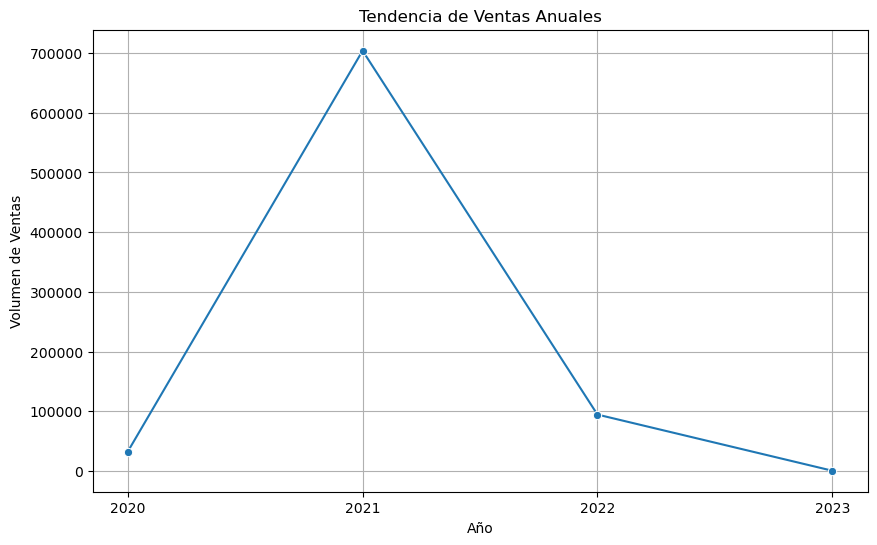

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Amount', marker='o')

plt.xticks(ticks=yearly_sales['Year'], labels=yearly_sales['Year'].astype(int))
plt.title("Tendencia de Ventas Anuales")
plt.ylabel("Volumen de Ventas")
plt.xlabel("Año")
plt.grid(True)
plt.show()


Se puede ver una tendencia de crecimiento lineal hasta 2021 y luego una caída lineal hasta 2022. Lo que denota que la empresa de cosméticos
no pudo mantener las ventas 


### Tendencia mensual

In [78]:
df["Month"] = df["Date"].dt.month
monthly_sales = df.groupby("Month")["Amount"].sum().reset_index()
monthly_sales
month_names = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 
               7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# Reemplazamos los números de los meses con sus nombres a través de la funcion map
monthly_sales["Month"] = monthly_sales["Month"].map(month_names)

monthly_sales


,Month,Amount
0,Enero,53244
1,Febrero,16417
2,Marzo,58050
3,Abril,147710
4,Mayo,145985
5,Junio,62159
6,Julio,64516
7,Agosto,66671
8,Septiembre,96169
9,Octubre,34823


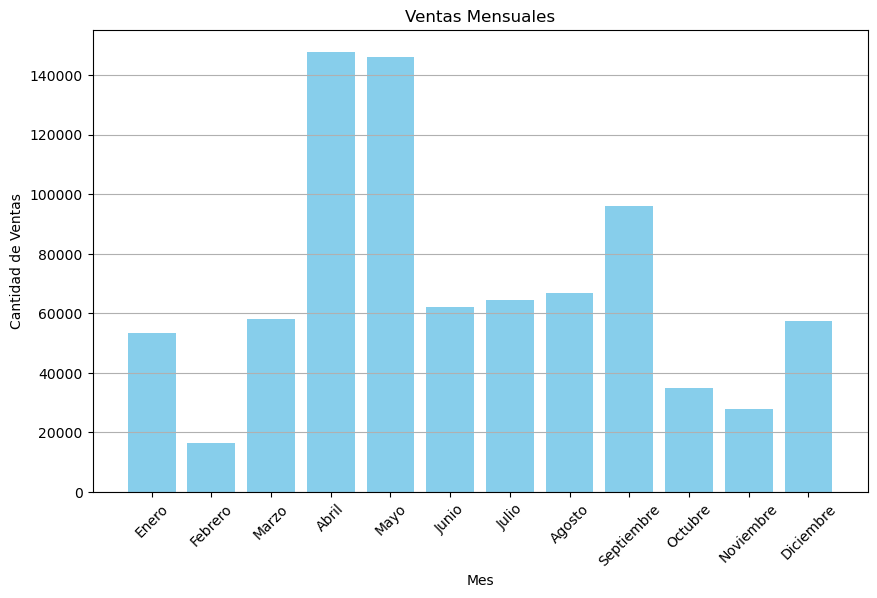

In [79]:
# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales["Month"], monthly_sales["Amount"], color='skyblue')

# Añadimos títulos y etiquetas
plt.title("Ventas Mensuales")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje X para mejor legibilidad
plt.grid(axis='y')

# Mostramos el gráfico
plt.show()


### Haremos un gráfico de torta con las ciudades con mayor volúmen de compra 


In [22]:
city_counts = df['City'].value_counts()
city_counts

Mumbai        84
Nagpur        78
Kolkata       70
New Delhi     59
Hyderabad     43
              ..
Howard         1
Trichy         1
New Panvel     1
Karjat         1
bjv            1
Name: City, Length: 261, dtype: int64

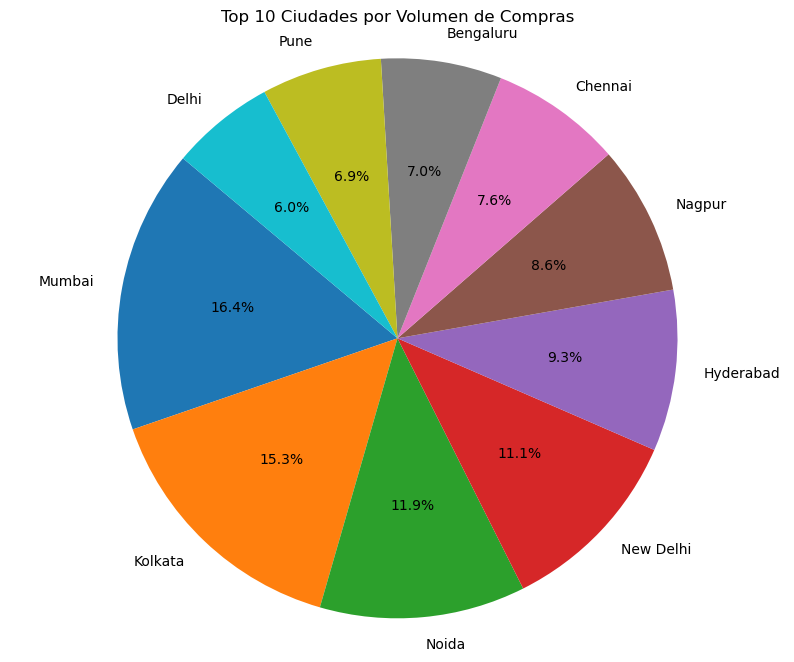

In [23]:
# Agrupamor por ciudad y sumar las compras
city_purchases = df.groupby('City')['Amount'].sum()

# Obtenemos las 10 ciudades con más compras
top_10_cities = city_purchases.nlargest(10)

# Calculamos los porcentajes
city_percentages = top_10_cities / top_10_cities.sum() * 100

# Creamos el gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie(city_percentages, labels=city_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Ciudades por Volumen de Compras")
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()


Este tipo de gráfico permite observar en qué lugares sería productivo enfocar la publicidad o logística 

### Ahora veamos cual es el precio de envío a estos clientes 

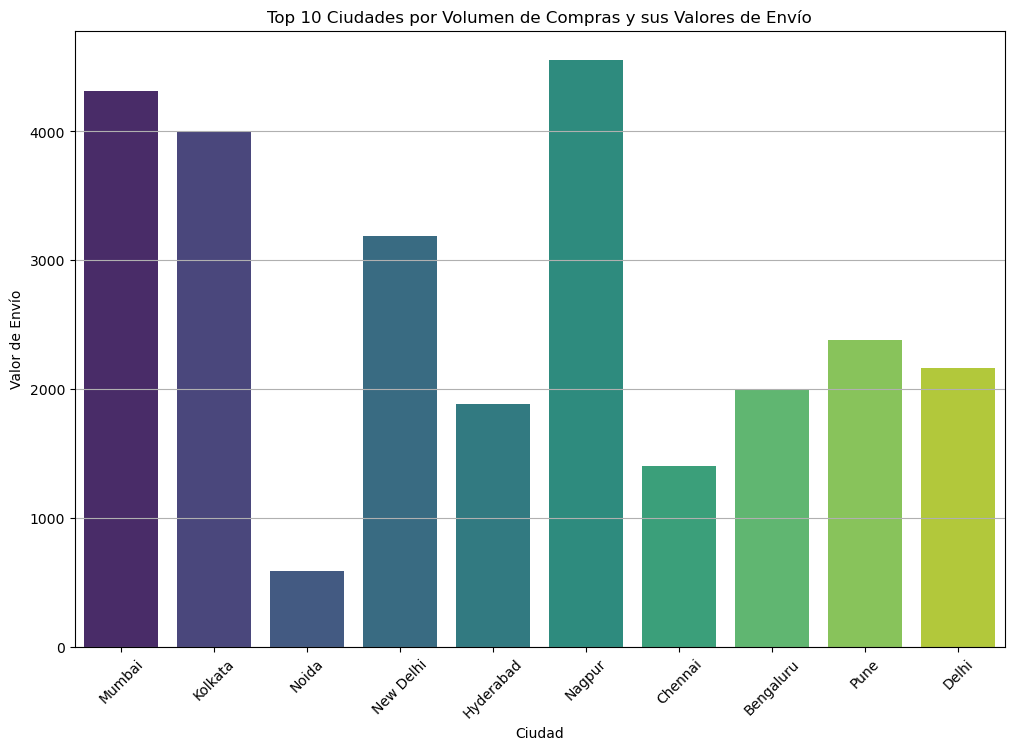

In [24]:
# Agrupamos por ciudad y sumamos las compras y el valor de envío
city_summary = df.groupby('City').agg({'Amount': 'sum', 'Shipping': 'sum'})

# Obtenemos las 10 ciudades con más compras
top_10_cities = city_summary.nlargest(10, 'Amount')

# Crear el gráfico de barras para los valores de envío
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cities.index, y=top_10_cities['Shipping'], palette='viridis')

# Personalizar el gráfico
plt.title("Top 10 Ciudades por Volumen de Compras y sus Valores de Envío")
plt.ylabel("Valor de Envío")
plt.xlabel("Ciudad")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mayor claridad
plt.grid(axis='y')
plt.show()


En este gráfico podemos observar que ciudades como Mumbai y Nagpur tienen el costo de envío más alto. 
Si comparamos con el grafico de torta podemos ver 

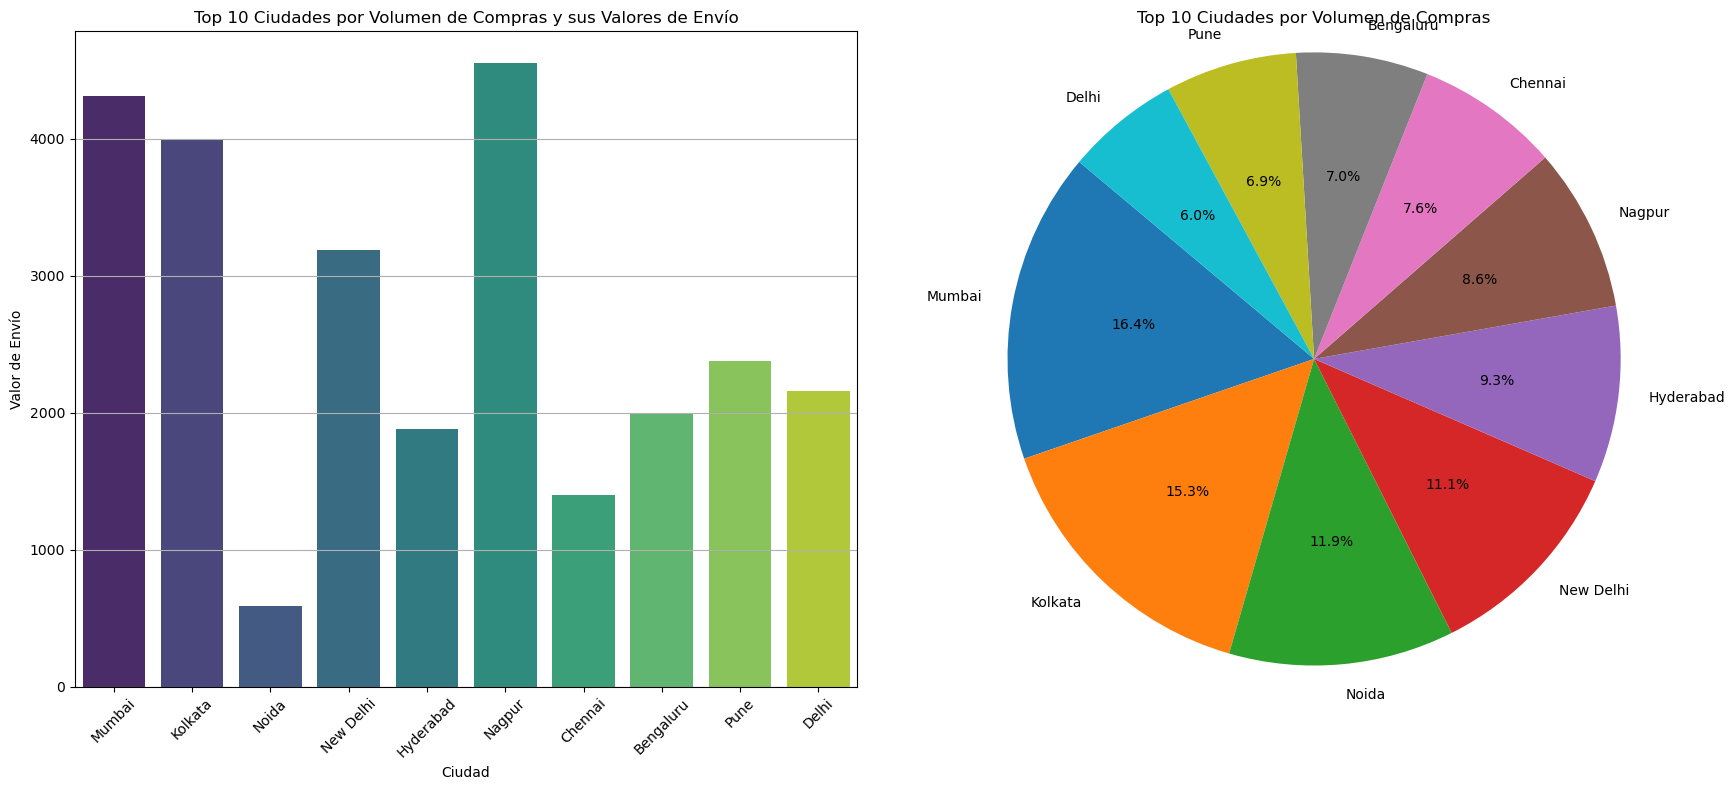

In [25]:
# Agrupar por ciudad y sumar las compras y el valor de envío
city_summary = df.groupby('City').agg({'Amount': 'sum', 'Shipping': 'sum'})

# Obtener las 10 ciudades con más compras
top_10_cities = city_summary.nlargest(10, 'Amount')

# Calcular los porcentajes de compras para el gráfico de torta
city_percentages = top_10_cities['Amount'] / top_10_cities['Amount'].sum() * 100

# Crear subplots para el gráfico de barras y el gráfico de torta
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de barras para los valores de envío
sns.barplot(x=top_10_cities.index, y=top_10_cities['Shipping'], palette='viridis', ax=ax1)
ax1.set_title("Top 10 Ciudades por Volumen de Compras y sus Valores de Envío")
ax1.set_ylabel("Valor de Envío")
ax1.set_xlabel("Ciudad")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.grid(axis='y')

# Gráfico de torta para las compras
ax2.pie(city_percentages, labels=city_percentages.index, autopct='%1.1f%%', startangle=140)
ax2.set_title("Top 10 Ciudades por Volumen de Compras")
ax2.axis('equal')  # Para que el gráfico sea un círculo

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Si comparamos, podemos ver que Mumbai, la ciudad con mayor porcentaje de participacion en las compras online tiene el segundo precio más alto de envío

In [39]:
con_descuento = df[(df['Discount'] != 0)].shape[0]
sin_descuento = df[(df['Discount'] == 0)].shape[0]
resultado = pd.DataFrame({
    "Condicion": ["Se aplicó descuento", "No se aplicó descuento"],
    "Cantidad": [con_descuento, sin_descuento]
})
resultado

,Condicion,Cantidad
0,Se aplicó descuento,308
1,No se aplicó descuento,819


Veremos si la cantidad de veces que se aplicó un descuento la venta fue existosa 


In [46]:
ventas_exitosas = df[df['Status'] == 'Successful']

In [47]:
con_descuento = ventas_exitosas[ventas_exitosas["Discount"] != 0].shape[0]
sin_descuento = ventas_exitosas[ventas_exitosas["Discount"] ==0].shape[0]
ventas_df= pd.DataFrame({
    "Condicion": ["Con descuento", "No se aplicó descuento"], 
    "Cantidad" : [con_descuento, sin_descuento]
})

ventas_df

,Condicion,Cantidad
0,Con descuento,298
1,No se aplicó descuento,794


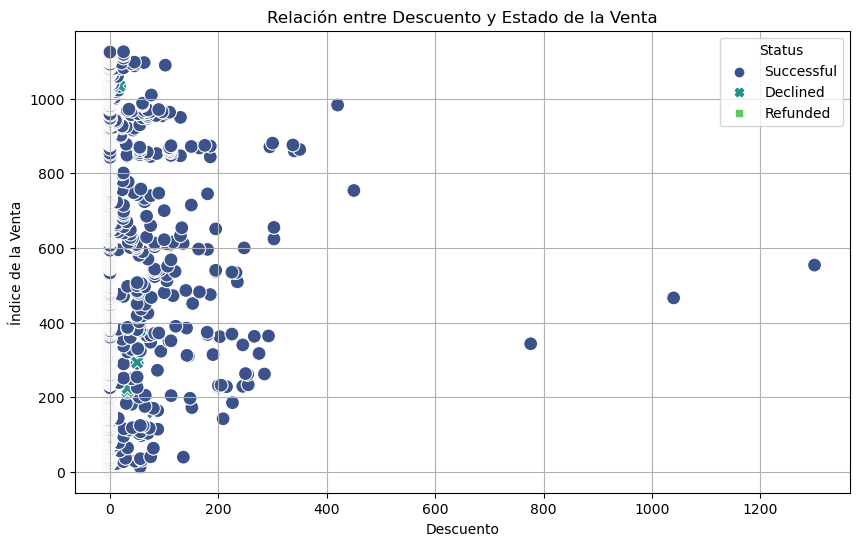

In [48]:
# Creaamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y=df.index, hue='Status', style='Status', s=100, palette='viridis')

# Personalizamos el gráfico
plt.title("Relación entre Descuento y Estado de la Venta")
plt.xlabel("Descuento")
plt.ylabel("Índice de la Venta")
plt.grid(True)
plt.show()


El gráfico muestra que no hay una relacion directa entre el descuento aplicado sobre el producto y el índice de venta, o que el descuento no es incentivo de compra 

¿ Hay una relación entre el precio de envío y las ventas? 

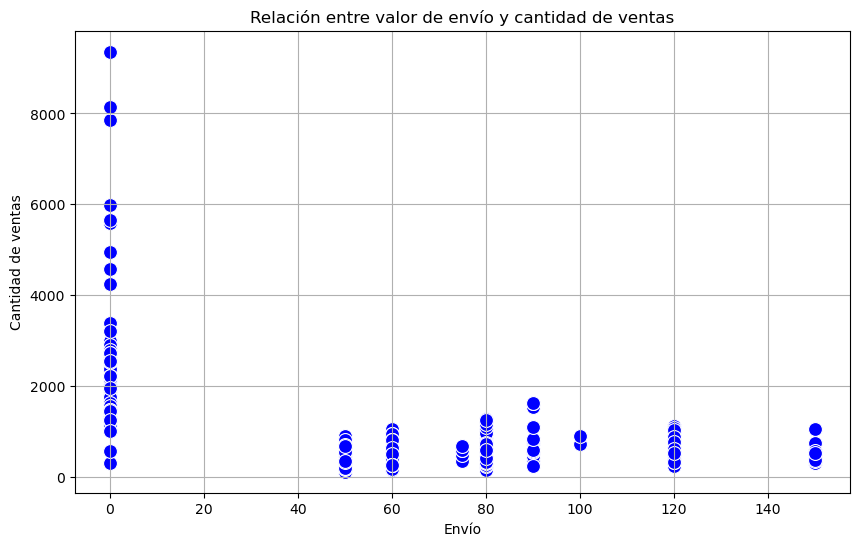

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Shipping', y="Amount", s=100, color= "blue")

# Personalizamos el gráfico

plt.title("Relación entre valor de envío y cantidad de ventas")
plt.xlabel("Envío")
plt.ylabel("Cantidad de ventas")
plt.grid(True)
plt.show()


Este gráfico muestra que no hay una correlación fuerte y directa entre la cantidad de ventas y el precio de envío 

In [56]:
# Calculamos el coeficiente de correlación
correlacion = df['Shipping'].corr(df['Amount'])
print(f'Coeficiente de correlación: {correlacion:.2f}')


Coeficiente de correlación: -0.45


El coeficiente de correlación calculado muestra una correlación negativa moderada. Esto quiere decir que la cantidad que invierte el comprador tiende a bajar en la medida que sube el costo de envío

## Resultados generales 

 - Se puede ver un incremento lineal en la tendencia de compra online de productos cosméticos desde 2020 hasta 2021 
 - Se puede observar que el hay meses en donde la cantidad de compras es mayor, siendo los meses de abril y mayo los de mayor ventas lo que puede interpretarse como un incremento estacional. En estos meses India cuenta con varias festividades que pueden dar lugar a una mayor necesidad de productos estéticos 
 - El mes con menor volúmen es febrero 
 - En el grafico de torta se observan las 10 ciudades con mayor volúmen de compra de productos esteticos online
 - En el grafico de barra se observan los valores de envío a las 10 ciudades con mayor volúmen de compra 
 - Se comparan estos gráficos porque se supone que la caída de ventas se puede deber al costo del envío 
 - Se evalúa si existe una correlación entre la cantidad de ventas y los descuentos, no se encuentra una correlación significativa 
 - Se muestra la leve correlación que existe entre el precio de envío y el volúmen de compras 